In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
columns_meaning = ["id - a unique identifier for each trip",
"vendor_id - a code indicating the provider associated with the trip record",
"pickup_datetime - date and time when the meter was engaged",
"dropoff_datetime - date and time when the meter was disengaged",
"passenger_count - the number of passengers in the vehicle (driver entered value)",
"pickup_longitude - the longitude where the meter was engaged",
"pickup_latitude - the latitude where the meter was engaged",
"dropoff_longitude - the longitude where the meter was disengaged",
"dropoff_latitude - the latitude where the meter was disengaged",
"store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip",
"trip_duration - duration of the trip in seconds"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
df["passenger_count"].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [8]:
df["store_and_fwd_flag"].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

## Columns which will not affect out target (By research and common sense):- 
    1)- Id

In [9]:
df["id"].nunique()

1458644

In [10]:
df.duplicated().sum() #No duplicated values. 

0

In [11]:
df.isnull().sum() #No Null Values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
df["vendor_id"].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [13]:
df.drop("id",axis=1,inplace=True) #Dropped the id column. 

# Our Analysis :- 
    1)- Id is just used for identification, Hence, It will not affect out targer variable that is trip_duration.
    2)- Pickup/dropoff date time needs to be divided into date and time columns. 
    3)- There are no NULL VALUES in the dataset.
    4)- There are no DUPLICATE ROWS in the dataset.
    5)- Passenger_count has possible outliers.

# Trip Duration is out target variable

# To do :- 
    1)- Seperate pickup/dropoff date and time
    2)- Convert date time into date time data type
    3)- Check for more outliers and handle them. 

#Pickup and Dropoff Date_time 
#Seperating pickup date and pickup time and dropoff date and dropoff time 
pickup_date = []
pickup_time = []
dropoff_date = []
dropoff_time = []

for i in range(0,df.shape[0]):
    a = df["pickup_datetime"][i].split(" ")
    b = df["dropoff_datetime"][i].split(" ")
    pickup_date.append(a[0])
    pickup_time.append(a[1])
    dropoff_date.append(b[0])
    dropoff_time.append(b[1])

pickup_date = pd.Series(pickup_date)
pickup_time = pd.Series(pickup_time)
dropoff_date = pd.Series(dropoff_date)
dropoff_time = pd.Series(dropoff_time)
    
modified_dataframe = pd.concat([df,pickup_date,pickup_time,dropoff_date,dropoff_time],axis=1)

modified_dataframe

# Changing column names
new_column = {0:"pickup_date",1:"pickup_time",2:"dropoff_date",3:"dropoff_time"}
modified_dataframe.rename(columns=new_column,inplace=True)

# Dropping pickup_datetime and dropoff datetime columns
modified_dataframe.drop(["pickup_datetime","dropoff_datetime"],axis=1,inplace=True)

modified_dataframe.head()

modified_dataframe.info()

# Changing Datatype 
modified_dataframe["pickup_date"] = pd.to_datetime(modified_dataframe["pickup_date"])
modified_dataframe["pickup_time"] = pd.to_datetime(modified_dataframe["pickup_time"])
modified_dataframe["dropoff_date"] = pd.to_datetime(modified_dataframe["dropoff_date"])
modified_dataframe["dropoff_time"] = pd.to_datetime(modified_dataframe["dropoff_time"])

modified_dataframe.head()

#Checking if pickup date and drop off dates are different
a = 0
for i in range(0,df.shape[0]):
    if(modified_dataframe["pickup_date"][i]==modified_dataframe["dropoff_date"][i]):
        a = 1
        if(a == 0):
            x = modified_dataframe("pickup_date")[i]
            y = modified_datafrmae("dropoff_date")[i]
            print(f"Date is different. Pickup Date = {x} and Dropoff Date is {y}")
        

# Checking if there are more than one taxi running on a single date|
df.shape[0] - modified_dataframe.duplicated(subset="pickup_date").sum() 

modified_dataframe.head()

In [14]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [15]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [16]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 111.3+ MB


In [18]:
#Handling Outliers 
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='passenger_count'>

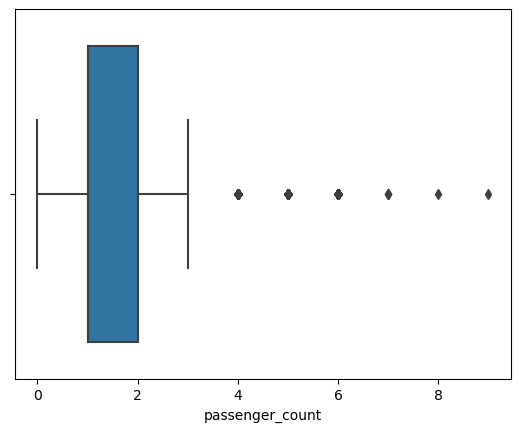

In [19]:
sns.boxplot(data=df,x="passenger_count")

In [20]:
df["passenger_count"].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [21]:
for i in range(0,df.shape[0]):
    if(df["passenger_count"][i] in [0,7,8,9]):
        df["passenger_count"].replace(df["passenger_count"][i],np.nan,inplace=True)

In [22]:
df.isnull().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count       65
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: xlabel='passenger_count'>

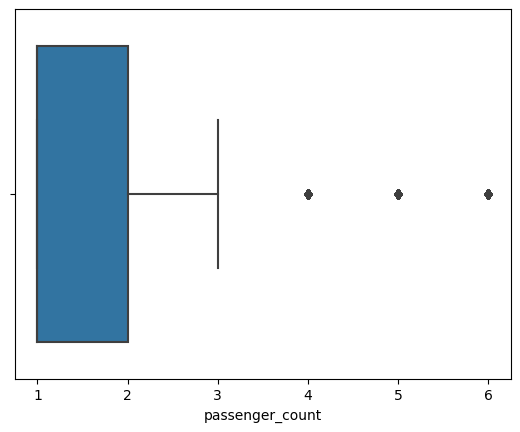

In [25]:
sns.boxplot(data=df,x="passenger_count")

In [26]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06
mean,1.534951e+00,1.664578e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594638e+02
std,4.987771e-01,1.314181e+00,7.090125e-02,3.288016e-02,7.064251e-02,3.588949e-02,5.237073e+03
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,6.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [27]:
df.passenger_count.value_counts()

1.0    1033540
2.0     210318
5.0      78088
3.0      59896
6.0      48333
4.0      28404
Name: passenger_count, dtype: int64

In [28]:
#Handling Outliters 
iqr = df["passenger_count"].quantile(0.75) - df["passenger_count"].quantile(0.25)

upper_limit = df["passenger_count"].quantile(0.75) + 1.5 * iqr
lower_limit = df["passenger_count"].quantile(0.25) - 1.5 * iqr

In [29]:
upper_limit, lower_limit

(3.5, -0.5)

In [30]:
upper_limit = 3
lower_limit = 1

In [31]:
df["passenger_count"] = np.where(df["passenger_count"]<upper_limit,df["passenger_count"],upper_limit)

In [32]:
df["passenger_count"].value_counts()

1.0    1033540
3.0     214721
2.0     210318
Name: passenger_count, dtype: int64

In [33]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06
mean,1.534951e+00,1.438619e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594638e+02
std,4.987771e-01,7.352942e-01,7.090125e-02,3.288016e-02,7.064251e-02,3.588949e-02,5.237073e+03
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,3.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<Axes: xlabel='passenger_count'>

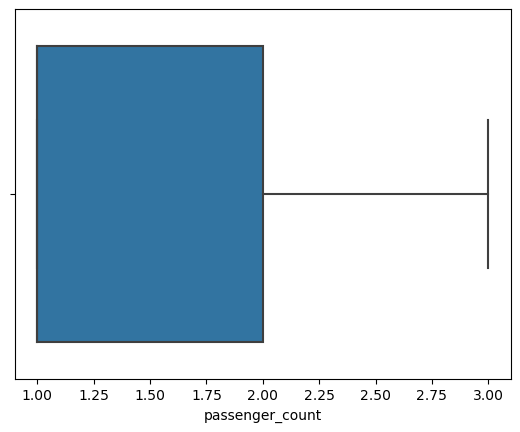

In [34]:
sns.boxplot(data=df,x="passenger_count")

# passenger_count outliers handled

In [35]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435


<Axes: xlabel='pickup_longitude'>

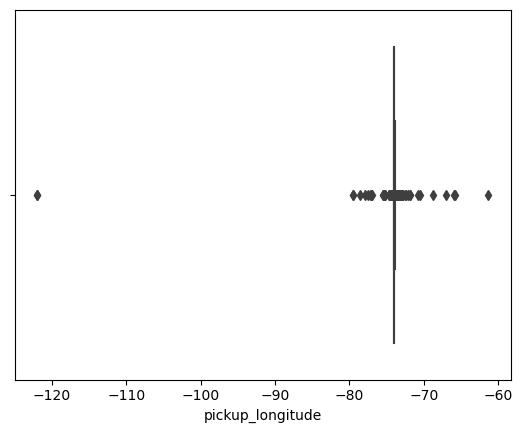

In [36]:
sns.boxplot(data=df,x="pickup_longitude")

In [37]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
   
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    radius = 6371.0
    
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    
    return distance

In [38]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [39]:
df.shape[0]

1458579

In [40]:
a = []

for i in range(df.shape[0]):
    lat1 = df["pickup_latitude"].iloc[i]
    lon1 = df["pickup_longitude"].iloc[i]
    lat2 = df["dropoff_latitude"].iloc[i]
    lon2 = df["dropoff_longitude"].iloc[i]
    
    if pd.notnull(lat1) and pd.notnull(lon1) and pd.notnull(lat2) and pd.notnull(lon2):
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        a.append(distance)
    else:
        a.append(np.nan)


In [41]:
distance = pd.Series(a)

In [42]:
distance.shape

(1458579,)

In [43]:
df.shape

(1458579, 10)

In [44]:
df_reset = df.reset_index(drop=True)
distance_reset = distance.reset_index(drop=True)

concatenated_df = pd.concat([df_reset, distance_reset], axis=1)


In [45]:
concatenated_df.shape

(1458579, 11)

In [46]:
concatenated_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [47]:
new_name = {0:"distance"}
concatenated_df.rename(columns=new_name,inplace=True)

In [48]:
df_new = concatenated_df
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [49]:
df_new.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [50]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,N,435,1.188588


In [51]:
df_new.corr()

C:\Users\khushi garg\AppData\Local\Temp\ipykernel_17640\4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,vendor_id,passenger_count,trip_duration,distance
vendor_id,1.000000,0.251647,0.020297,0.008116
passenger_count,0.251647,1.000000,0.008974,0.015962
trip_duration,0.020297,0.008974,1.000000,0.094790
distance,0.008116,0.015962,0.094790,1.000000


# Univariate Analysis

## Vendor_id 

<Axes: xlabel='vendor_id'>

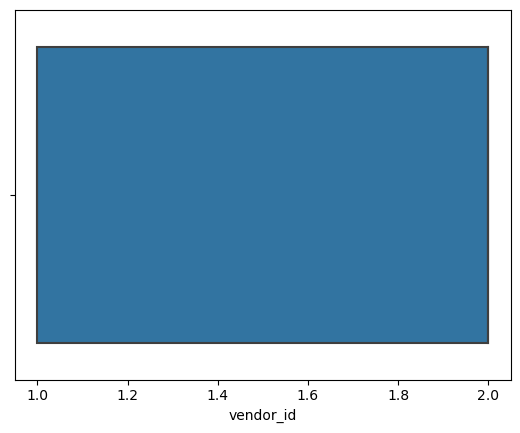

In [52]:
#Box-plot
sns.boxplot(df_new,x="vendor_id")

<Axes: xlabel='vendor_id', ylabel='Count'>

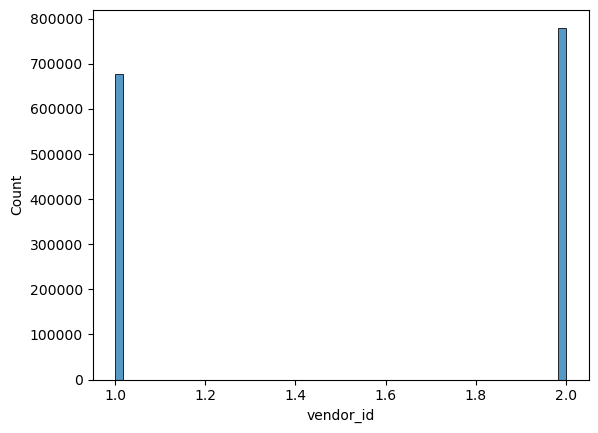

In [53]:
#Histogram
sns.histplot(df_new,x="vendor_id")

## passenger_count

<Axes: xlabel='passenger_count', ylabel='Count'>

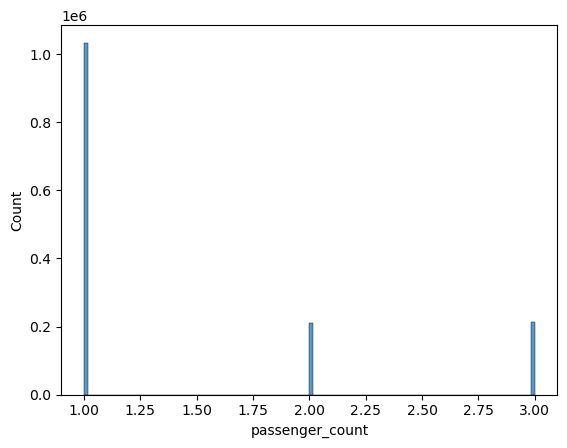

In [54]:
sns.histplot(df_new,x="passenger_count")

## Distance

<Axes: xlabel='distance'>

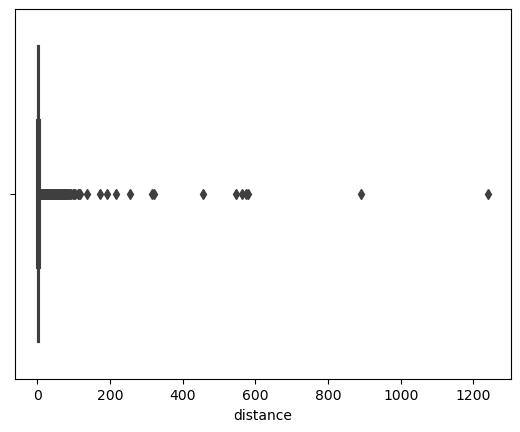

In [55]:
sns.boxplot(df_new,x="distance")

In [56]:
df_new["distance"].value_counts()

0.000000    5887
0.000424     101
0.000424      52
0.000424      48
0.000848      37
            ... 
0.434273       1
3.809269       1
0.563329       1
5.925427       1
1.134042       1
Name: distance, Length: 1452237, dtype: int64

In [57]:
df_new.describe()

,vendor_id,passenger_count,trip_duration,distance
count,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06
mean,1.534951e+00,1.438619e+00,9.594638e+02,3.440962e+00
std,4.987771e-01,7.352942e-01,5.237073e+03,4.296548e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.970000e+02,1.231912e+00
50%,2.000000e+00,1.000000e+00,6.620000e+02,2.093784e+00
75%,2.000000e+00,2.000000e+00,1.075000e+03,3.875452e+00
max,2.000000e+00,3.000000e+00,3.526282e+06,1.240909e+03


In [58]:
#Handling Outliters for distance
iqr = df_new["distance"].quantile(0.75) - df_new["distance"].quantile(0.25)

upper_limit = df_new["distance"].quantile(0.75) + 1.5 * iqr
lower_limit = df_new["distance"].quantile(0.25) - 1.5 * iqr

In [59]:
upper_limit,lower_limit

(7.840761512329841, -2.733397454937129)

In [60]:
lower_limit = 0 #Distance cannot be negative

In [61]:
df_new["distance"] = np.where(df_new["distance"]<upper_limit,df_new["distance"],upper_limit)

In [62]:
df_new.describe()

,vendor_id,passenger_count,trip_duration,distance
count,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06
mean,1.534951e+00,1.438619e+00,9.594638e+02,2.899927e+00
std,4.987771e-01,7.352942e-01,5.237073e+03,2.245491e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.970000e+02,1.231912e+00
50%,2.000000e+00,1.000000e+00,6.620000e+02,2.093784e+00
75%,2.000000e+00,2.000000e+00,1.075000e+03,3.875452e+00
max,2.000000e+00,3.000000e+00,3.526282e+06,7.840762e+00


<Axes: xlabel='distance'>

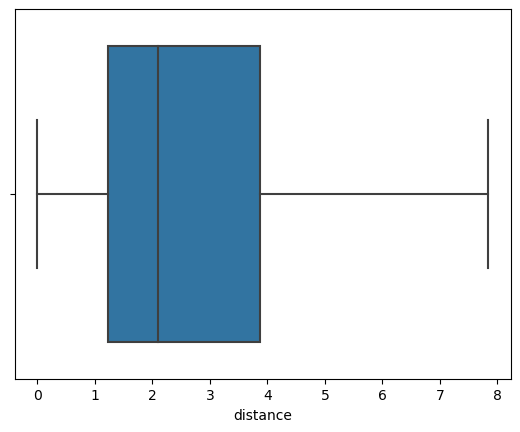

In [63]:
sns.boxplot(df_new,x="distance")

In [64]:
df_new.corr()

C:\Users\khushi garg\AppData\Local\Temp\ipykernel_17640\4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,vendor_id,passenger_count,trip_duration,distance
vendor_id,1.000000,0.251647,0.020297,0.006895
passenger_count,0.251647,1.000000,0.008974,0.015480
trip_duration,0.020297,0.008974,1.000000,0.098837
distance,0.006895,0.015480,0.098837,1.000000


## pickup_datetime

In [65]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,N,435,1.188588


In [66]:
df_new.drop("dropoff_datetime",axis=1,inplace=True)

In [67]:
df_new.corr()

C:\Users\khushi garg\AppData\Local\Temp\ipykernel_17640\4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,vendor_id,passenger_count,trip_duration,distance
vendor_id,1.000000,0.251647,0.020297,0.006895
passenger_count,0.251647,1.000000,0.008974,0.015480
trip_duration,0.020297,0.008974,1.000000,0.098837
distance,0.006895,0.015480,0.098837,1.000000


In [68]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,1.0,N,455,1.498521
1,1,2016-06-12 00:43:35,1.0,N,663,1.805507
2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098
3,2,2016-04-06 19:32:31,1.0,N,429,1.485498
4,2,2016-03-26 13:30:55,1.0,N,435,1.188588


In [69]:
year = df_new["pickup_datetime"].dt.year
month = df_new["pickup_datetime"].dt.month
days = df_new["pickup_datetime"].dt.day
hours = df_new["pickup_datetime"].dt.hour
minutes = df_new["pickup_datetime"].dt.minute
seconds = df_new["pickup_datetime"].dt.second

In [70]:
year.shape,month.shape,days.shape,hours.shape,minutes.shape,seconds.shape

((1458579,), (1458579,), (1458579,), (1458579,), (1458579,), (1458579,))

In [71]:
df_new = df_new.reset_index()

In [72]:
df_new["year"] = df_new["pickup_datetime"].dt.year

In [73]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
dtype: int64

In [74]:
df_new["month"] = df_new["pickup_datetime"].dt.month
df_new["days"] = df_new["pickup_datetime"].dt.day
df_new["hour"] = df_new["pickup_datetime"].dt.hour
df_new["minute"] = df_new["pickup_datetime"].dt.minute
df_new["second"] = df_new["pickup_datetime"].dt.second

In [75]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
month                 0
days                  0
hour                  0
minute                0
second                0
dtype: int64

In [76]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,year,month,days,hour,minute,second
0,0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,2016,3,14,17,24,55
1,1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,2016,6,12,0,43,35
2,2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,2016,1,19,11,35,24
3,3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,2016,4,6,19,32,31
4,4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,2016,3,26,13,30,55


In [77]:
df_new.corr()

C:\Users\khushi garg\AppData\Local\Temp\ipykernel_17640\4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,index,vendor_id,passenger_count,trip_duration,distance,year,month,days,hour,minute,second
index,1.000000,0.000984,0.000881,0.000463,-0.000429,NaN,0.001193,0.000873,-0.000292,0.001476,0.000591
vendor_id,0.000984,1.000000,0.251647,0.020297,0.006895,NaN,-0.006220,0.000727,0.009306,-0.000391,0.001088
passenger_count,0.000881,0.251647,1.000000,0.008974,0.015480,NaN,0.000760,0.002966,0.018322,0.000404,0.000526
trip_duration,0.000463,0.020297,0.008974,1.000000,0.098837,NaN,0.006592,0.000576,0.003684,-0.002346,0.000057
distance,-0.000429,0.006895,0.015480,0.098837,1.000000,NaN,0.019418,0.008156,-0.027086,-0.010331,0.000884
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.001193,-0.006220,0.000760,0.006592,0.019418,NaN,1.000000,-0.015143,-0.003442,-0.001059,0.000203
days,0.000873,0.000727,0.002966,0.000576,0.008156,NaN,-0.015143,1.000000,0.000413,-0.000149,0.000215
hour,-0.000292,0.009306,0.018322,0.003684,-0.027086,NaN,-0.003442,0.000413,1.000000,-0.003137,0.001449
minute,0.001476,-0.000391,0.000404,-0.002346,-0.010331,NaN,-0.001059,-0.000149,-0.003137,1.000000,-0.001032


In [78]:
df_new.isnull().sum()

index                 0
vendor_id             0
pickup_datetime       0
passenger_count       0
store_and_fwd_flag    0
trip_duration         0
distance              0
year                  0
month                 0
days                  0
hour                  0
minute                0
second                0
dtype: int64

In [79]:
df_new.year.value_counts()

2016    1458579
Name: year, dtype: int64

In [80]:
df_new.drop("year",axis=1,inplace=True)

In [81]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,3,14,17,24,55
1,1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,6,12,0,43,35
2,2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,1,19,11,35,24
3,3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,4,6,19,32,31
4,4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,3,26,13,30,55


In [82]:
df_new.drop("index",axis=1,inplace=True)

In [83]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,3,14,17,24,55
1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,6,12,0,43,35
2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,1,19,11,35,24
3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,4,6,19,32,31
4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,3,26,13,30,55


In [84]:
df_new.corr()

C:\Users\khushi garg\AppData\Local\Temp\ipykernel_17640\4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second
vendor_id,1.000000,0.251647,0.020297,0.006895,-0.006220,0.000727,0.009306,-0.000391,0.001088
passenger_count,0.251647,1.000000,0.008974,0.015480,0.000760,0.002966,0.018322,0.000404,0.000526
trip_duration,0.020297,0.008974,1.000000,0.098837,0.006592,0.000576,0.003684,-0.002346,0.000057
distance,0.006895,0.015480,0.098837,1.000000,0.019418,0.008156,-0.027086,-0.010331,0.000884
month,-0.006220,0.000760,0.006592,0.019418,1.000000,-0.015143,-0.003442,-0.001059,0.000203
days,0.000727,0.002966,0.000576,0.008156,-0.015143,1.000000,0.000413,-0.000149,0.000215
hour,0.009306,0.018322,0.003684,-0.027086,-0.003442,0.000413,1.000000,-0.003137,0.001449
minute,-0.000391,0.000404,-0.002346,-0.010331,-0.001059,-0.000149,-0.003137,1.000000,-0.001032
second,0.001088,0.000526,0.000057,0.000884,0.000203,0.000215,0.001449,-0.001032,1.000000


In [85]:
df_new.month.value_counts()

3    256179
4    251636
5    248474
2    238288
6    234310
1    229692
Name: month, dtype: int64

In [86]:
df_new.describe()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second
count,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06,1.458579e+06
mean,1.534951e+00,1.438619e+00,9.594638e+02,2.899927e+00,3.516833e+00,1.550414e+01,1.360657e+01,2.959018e+01,2.947359e+01
std,4.987771e-01,7.352942e-01,5.237073e+03,2.245491e+00,1.681036e+00,8.703133e+00,6.399583e+00,1.732477e+01,1.731991e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,3.970000e+02,1.231912e+00,2.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.400000e+01
50%,2.000000e+00,1.000000e+00,6.620000e+02,2.093784e+00,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,2.900000e+01
75%,2.000000e+00,2.000000e+00,1.075000e+03,3.875452e+00,5.000000e+00,2.300000e+01,1.900000e+01,4.500000e+01,4.400000e+01
max,2.000000e+00,3.000000e+00,3.526282e+06,7.840762e+00,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


<Axes: >

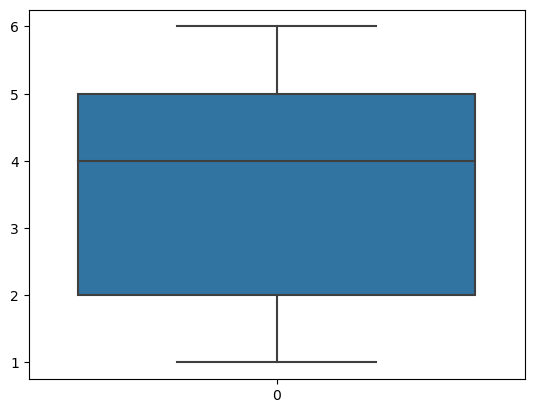

In [87]:
sns.boxplot(df_new["month"])

<Axes: >

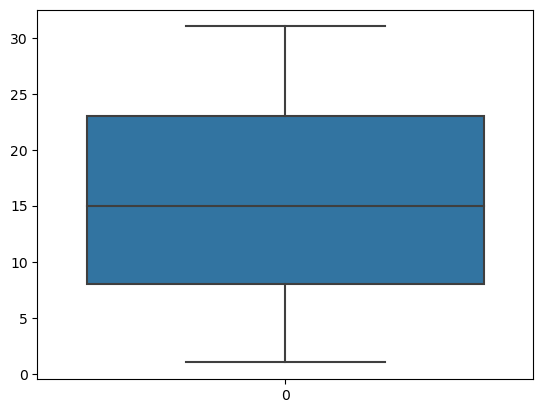

In [88]:
sns.boxplot(df_new["days"])

<Axes: >

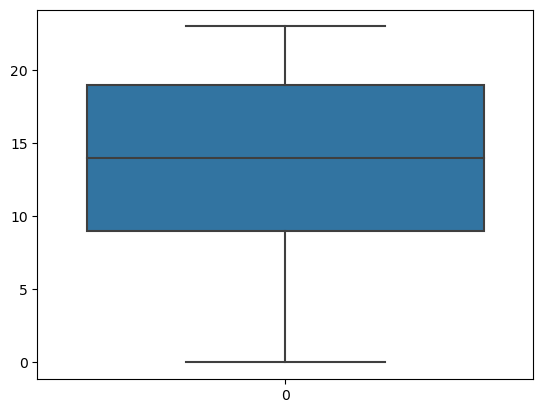

In [89]:
sns.boxplot(df_new["hour"])

<Axes: >

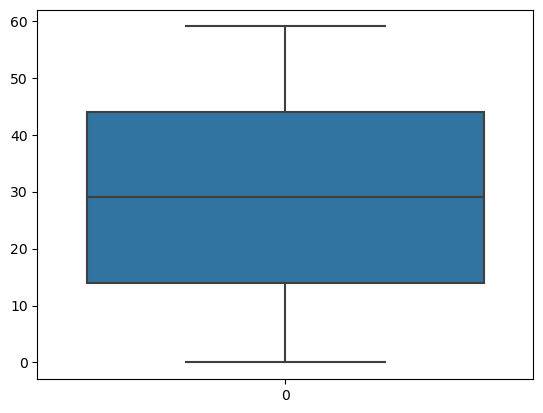

In [90]:
sns.boxplot(df_new["second"])

<Axes: >

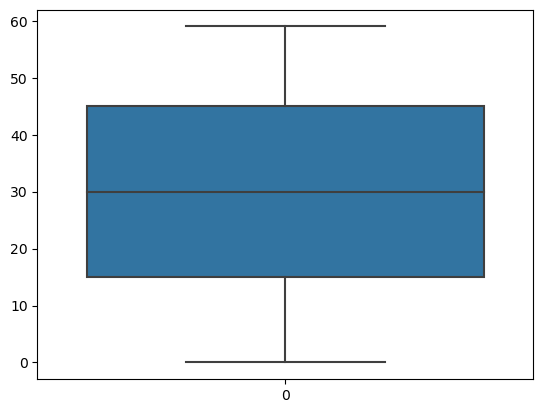

In [91]:
sns.boxplot(df_new["minute"])

In [92]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,3,14,17,24,55
1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,6,12,0,43,35
2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,1,19,11,35,24
3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,4,6,19,32,31
4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,3,26,13,30,55


In [93]:
df_new.drop("pickup_datetime",axis=1,inplace=True)

In [94]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,1.0,N,455,1.498521,3,14,17,24,55
1,1,1.0,N,663,1.805507,6,12,0,43,35
2,2,1.0,N,2124,6.385098,1,19,11,35,24
3,2,1.0,N,429,1.485498,4,6,19,32,31
4,2,1.0,N,435,1.188588,3,26,13,30,55


In [95]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
ohe = OneHotEncoder(sparse=False,drop="first")

In [97]:
store_and_fwd_flag_encoded = ohe.fit_transform(df_new[["store_and_fwd_flag"]])

In [98]:
ohe.categories_

[array(['N', 'Y'], dtype=object)]

In [99]:
df_new["Y"] = store_and_fwd_flag_encoded

In [100]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second,Y
0,2,1.0,N,455,1.498521,3,14,17,24,55,0.0
1,1,1.0,N,663,1.805507,6,12,0,43,35,0.0
2,2,1.0,N,2124,6.385098,1,19,11,35,24,0.0
3,2,1.0,N,429,1.485498,4,6,19,32,31,0.0
4,2,1.0,N,435,1.188588,3,26,13,30,55,0.0


In [101]:
df_new.rename({"Y":"Yes_store_and_fwd_flag"},axis=1,inplace=True)

In [102]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
0,2,1.0,N,455,1.498521,3,14,17,24,55,0.0
1,1,1.0,N,663,1.805507,6,12,0,43,35,0.0
2,2,1.0,N,2124,6.385098,1,19,11,35,24,0.0
3,2,1.0,N,429,1.485498,4,6,19,32,31,0.0
4,2,1.0,N,435,1.188588,3,26,13,30,55,0.0


In [103]:
df_new.drop("store_and_fwd_flag",axis=1,inplace=True)

In [104]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
0,2,1.0,455,1.498521,3,14,17,24,55,0.0
1,1,1.0,663,1.805507,6,12,0,43,35,0.0
2,2,1.0,2124,6.385098,1,19,11,35,24,0.0
3,2,1.0,429,1.485498,4,6,19,32,31,0.0
4,2,1.0,435,1.188588,3,26,13,30,55,0.0


In [105]:
df_new.corr()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
vendor_id,1.000000,0.251647,0.020297,0.006895,-0.006220,0.000727,0.009306,-0.000391,0.001088,-0.079859
passenger_count,0.251647,1.000000,0.008974,0.015480,0.000760,0.002966,0.018322,0.000404,0.000526,-0.018464
trip_duration,0.020297,0.008974,1.000000,0.098837,0.006592,0.000576,0.003684,-0.002346,0.000057,0.001730
distance,0.006895,0.015480,0.098837,1.000000,0.019418,0.008156,-0.027086,-0.010331,0.000884,0.023329
month,-0.006220,0.000760,0.006592,0.019418,1.000000,-0.015143,-0.003442,-0.001059,0.000203,0.000383
days,0.000727,0.002966,0.000576,0.008156,-0.015143,1.000000,0.000413,-0.000149,0.000215,0.001101
hour,0.009306,0.018322,0.003684,-0.027086,-0.003442,0.000413,1.000000,-0.003137,0.001449,0.002284
minute,-0.000391,0.000404,-0.002346,-0.010331,-0.001059,-0.000149,-0.003137,1.000000,-0.001032,0.000203
second,0.001088,0.000526,0.000057,0.000884,0.000203,0.000215,0.001449,-0.001032,1.000000,0.001324
Yes_store_and_fwd_flag,-0.079859,-0.018464,0.001730,0.023329,0.000383,0.001101,0.002284,0.000203,0.001324,1.000000


In [106]:
final_seconds = []
for i in range(0,df.shape[0]):
    x = df_new["hour"][i]*3600
    y = df_new["minute"][i]*60
    z = df_new["second"][i]
    
    sum = x+y+z
    final_seconds.append(sum)

In [107]:
df_new["final_seconds"] = final_seconds 

In [108]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag,final_seconds
0,2,1.0,455,1.498521,3,14,17,24,55,0.0,62695
1,1,1.0,663,1.805507,6,12,0,43,35,0.0,2615
2,2,1.0,2124,6.385098,1,19,11,35,24,0.0,41724
3,2,1.0,429,1.485498,4,6,19,32,31,0.0,70351
4,2,1.0,435,1.188588,3,26,13,30,55,0.0,48655


In [109]:
df_new.corr()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag,final_seconds
vendor_id,1.000000,0.251647,0.020297,0.006895,-0.006220,0.000727,0.009306,-0.000391,0.001088,-0.079859,0.009281
passenger_count,0.251647,1.000000,0.008974,0.015480,0.000760,0.002966,0.018322,0.000404,0.000526,-0.018464,0.018324
trip_duration,0.020297,0.008974,1.000000,0.098837,0.006592,0.000576,0.003684,-0.002346,0.000057,0.001730,0.003575
distance,0.006895,0.015480,0.098837,1.000000,0.019418,0.008156,-0.027086,-0.010331,0.000884,0.023329,-0.027527
month,-0.006220,0.000760,0.006592,0.019418,1.000000,-0.015143,-0.003442,-0.001059,0.000203,0.000383,-0.003486
days,0.000727,0.002966,0.000576,0.008156,-0.015143,1.000000,0.000413,-0.000149,0.000215,0.001101,0.000407
hour,0.009306,0.018322,0.003684,-0.027086,-0.003442,0.000413,1.000000,-0.003137,0.001449,0.002284,0.998983
minute,-0.000391,0.000404,-0.002346,-0.010331,-0.001059,-0.000149,-0.003137,1.000000,-0.001032,0.000203,0.041945
second,0.001088,0.000526,0.000057,0.000884,0.000203,0.000215,0.001449,-0.001032,1.000000,0.001324,0.002153
Yes_store_and_fwd_flag,-0.079859,-0.018464,0.001730,0.023329,0.000383,0.001101,0.002284,0.000203,0.001324,1.000000,0.002293


In [110]:
df_new.drop(["hour","second","minute"],axis=1,inplace=True)

In [111]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,Yes_store_and_fwd_flag,final_seconds
0,2,1.0,455,1.498521,3,14,0.0,62695
1,1,1.0,663,1.805507,6,12,0.0,2615
2,2,1.0,2124,6.385098,1,19,0.0,41724
3,2,1.0,429,1.485498,4,6,0.0,70351
4,2,1.0,435,1.188588,3,26,0.0,48655


# Experimenting

In [112]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

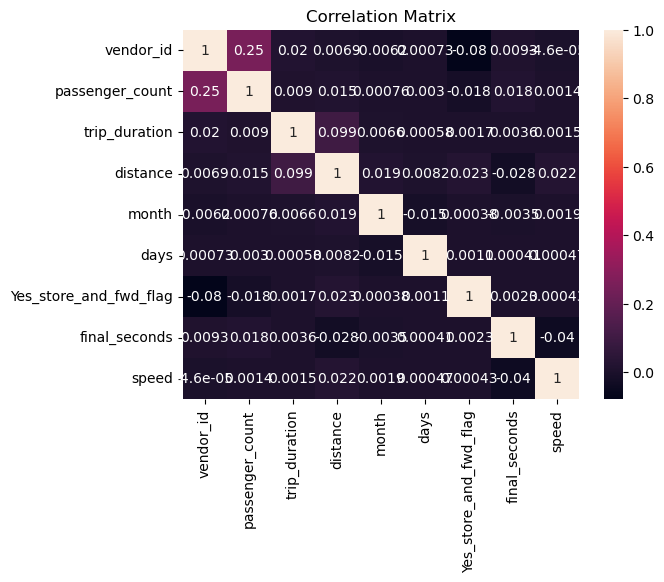

In [122]:
sns.heatmap(df_new.corr(), annot=True)
plt.title('Correlation Matrix')

In [116]:
# Calculating speed
speed = []
for i in range(0,df.shape[0]):
    speed_value = df_new["distance"][i]/df_new['final_seconds'][i]
    
    speed.append(speed_value)


C:\Users\khushi garg\AppData\Local\Temp\ipykernel_17640\1151586330.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  speed_value = df_new["distance"][i]/df_new['final_seconds'][i]


In [117]:
df_new["speed"] = speed 

In [118]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,Yes_store_and_fwd_flag,final_seconds,speed
0,2,1.0,455,1.498521,3,14,0.0,62695,0.000024
1,1,1.0,663,1.805507,6,12,0.0,2615,0.000690
2,2,1.0,2124,6.385098,1,19,0.0,41724,0.000153
3,2,1.0,429,1.485498,4,6,0.0,70351,0.000021
4,2,1.0,435,1.188588,3,26,0.0,48655,0.000024


In [124]:
df_new.isnull().sum()

vendor_id                 0
passenger_count           0
trip_duration             0
distance                  0
month                     0
days                      0
Yes_store_and_fwd_flag    0
final_seconds             0
speed                     0
dtype: int64

# Splitting the Data

In [131]:
X = df_new.drop(['trip_duration','speed'], axis=1)
y = df_new['trip_duration']

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
# Standardizing the input variables(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model training and Evaluation

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [143]:
# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

s1 = mean_squared_error(y_test,y_pred1,squared=False)


In [144]:
# DECISION TREE
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)

s2 = mean_squared_error(y_test,y_pred2,squared=False)


In [145]:
# GRADIENT BOOSTING
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3 = gb.predict(X_test)

s3 = mean_squared_error(y_test,y_pred3,squared=False)


In [146]:
# RANDOM FOREST
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)

s4 = mean_squared_error(y_test,y_pred4,squared=False)


In [147]:
# XGBOOST
xgb = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
xgb.fit(X_train, y_train)
y_pred5 = xgb.predict(X_test)

s5 = mean_squared_error(y_test,y_pred5,squared=False)


In [148]:
models = [LinearRegression(),DecisionTreeRegressor(), GradientBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]

rmse = [s1,s2,s3,s4,s5]

df1 = pd.DataFrame({'Model':models, 'RMSE':rmse})

In [149]:
df1

,Model,RMSE
0,LinearRegression(),3145.338933
1,DecisionTreeRegressor(),9596.097436
2,GradientBoostingRegressor(),3155.581182
3,RandomForestRegressor(),3608.433677
4,"XGBRegressor(base_score=None, booster=None, ca...",3300.835475
